In [1]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics
import os
import datetime
# hide warnings
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
# reading the dataset
housing = pd.read_csv("train.csv")

In [3]:
housing.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

# EDA | Data Cleaning

In [4]:
# There are missing values in multiple columns
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

#### Missing column values in %

In [842]:
percent_missing = housing.isnull().sum() * 100 / len(housing)
missing_value_df = pd.DataFrame({'column_name': housing.columns,
                                 'percent_missing': percent_missing})
# missing_value_df.sort_values('percent_missing', inplace=True)
missing_value_df.head(80)

column_name  percent_missing
Id                        Id         0.000000
MSSubClass        MSSubClass         0.000000
MSZoning            MSZoning         0.000000
LotFrontage      LotFrontage        17.739726
LotArea              LotArea         0.000000
Street                Street         0.000000
Alley                  Alley        93.767123
LotShape            LotShape         0.000000
LandContour      LandContour         0.000000
Utilities          Utilities         0.000000
LotConfig          LotConfig         0.000000
LandSlope          LandSlope         0.000000
Neighborhood    Neighborhood         0.000000
Condition1        Condition1         0.000000
Condition2        Condition2         0.000000
BldgType            BldgType         0.000000
HouseStyle        HouseStyle         0.000000
OverallQual      OverallQual         0.000000
OverallCond      OverallCond         0.000000
YearBuilt          YearBuilt         0.000000
YearRemodAdd    YearRemodAdd         0.000000
RoofStyle          RoofStyle         0.000000
RoofMatl            RoofMatl         0.000000
Exterior1st      Exterior1st         0.000000
Exterior2nd      Exterior2nd         0.000000
MasVnrType        MasVnrType         0.547945
MasVnrArea        MasVnrArea         0.547945
ExterQual          ExterQual         0.000000
ExterCond          ExterCond         0.000000
Foundation        Foundation         0.000000
BsmtQual            BsmtQual         2.534247
BsmtCond            BsmtCond         2.534247
BsmtExposure    BsmtExposure         2.602740
BsmtFinType1    BsmtFinType1         2.534247
BsmtFinSF1        BsmtFinSF1         0.000000
BsmtFinType2    BsmtFinType2         2.602740
BsmtFinSF2        BsmtFinSF2         0.000000
BsmtUnfSF          BsmtUnfSF         0.000000
TotalBsmtSF      TotalBsmtSF         0.000000
Heating              Heating         0.000000
HeatingQC          HeatingQC         0.000000
CentralAir        CentralAir         0.000000
Electrical        Electrical         0.068493
1stFlrSF            1stFlrSF         0.000000
2ndFlrSF            2ndFlrSF         0.000000
LowQualFinSF    LowQualFinSF         0.000000
GrLivArea          GrLivArea         0.000000
BsmtFullBath    BsmtFullBath         0.000000
BsmtHalfBath    BsmtHalfBath         0.000000
FullBath            FullBath         0.000000
HalfBath            HalfBath         0.000000
BedroomAbvGr    BedroomAbvGr         0.000000
KitchenAbvGr    KitchenAbvGr         0.000000
KitchenQual      KitchenQual         0.000000
TotRmsAbvGrd    TotRmsAbvGrd         0.000000
Functional        Functional         0.000000
Fireplaces        Fireplaces         0.000000
FireplaceQu      FireplaceQu        47.260274
GarageType        GarageType         5.547945
GarageYrBlt      GarageYrBlt         5.547945
GarageFinish    GarageFinish         5.547945
GarageCars        GarageCars         0.000000
GarageArea        GarageArea         0.000000
GarageQual        GarageQual         5.547945
GarageCond        GarageCond         5.547945
PavedDrive        PavedDrive         0.000000
WoodDeckSF        WoodDeckSF         0.000000
OpenPorchSF      OpenPorchSF         0.000000
EnclosedPorch  EnclosedPorch         0.000000
3SsnPorch          3SsnPorch         0.000000
ScreenPorch      ScreenPorch         0.000000
PoolArea            PoolArea         0.000000
PoolQC                PoolQC        99.520548
Fence                  Fence        80.753425
MiscFeature      MiscFeature        96.301370
MiscVal              MiscVal         0.000000
MoSold                MoSold         0.000000
YrSold                YrSold         0.000000
SaleType            SaleType         0.000000
SaleCondition  SaleCondition         0.000000

#### Treating all missing values

In [843]:
# replacgin all NA to No alley access
housing['Alley'] = housing['Alley'].replace(np.nan, 'No alley access')

## this column has 70% mean and 69% median to treating with mean value
housing['LotFrontage'].fillna(housing['LotFrontage'].mean(), inplace=True)

# replacing all NA to None
housing['MasVnrType'] = housing['MasVnrType'].replace(np.nan, 'None')


## this column has min, 25%, 50% as 0 so treating with median value
housing['MasVnrArea'].fillna(housing['MasVnrArea'].median(), inplace=True)

# replacgin all NA to No Basement
housing['BsmtQual'] = housing['BsmtQual'].replace(np.nan, 'No Basement')
housing['BsmtCond'] = housing['BsmtCond'].replace(np.nan, 'No Basement')
housing['BsmtExposure'] = housing['BsmtExposure'].replace(np.nan, 'No Basement')
housing['BsmtFinType1'] = housing['BsmtFinType1'].replace(np.nan, 'No Basement')
housing['BsmtFinType2'] = housing['BsmtFinType2'].replace(np.nan, 'No Basement')

# replacgin all NA to No Fireplace 
housing['FireplaceQu'] = housing['FireplaceQu'].replace(np.nan, 'No Fireplace')


# fill Electrical with mode value
mode = housing['Electrical'].mode()
housing['Electrical'] = housing['Electrical'].replace(np.nan, mode[0])

# replacgin all NA to No Garage 
housing['GarageType'] = housing['GarageType'].replace(np.nan, 'No Garage')
housing['GarageFinish'] = housing['GarageFinish'].replace(np.nan, 'No Garage')
housing['GarageQual'] = housing['GarageQual'].replace(np.nan, 'No Garage')
housing['GarageCond'] = housing['GarageCond'].replace(np.nan, 'No Garage')

# replacgin all NA to No Pool 
housing['PoolQC'] = housing['PoolQC'].replace(np.nan, 'No Pool')


# replacgin all NA to No Fence 
housing['Fence'] = housing['Fence'].replace(np.nan, 'No Fence')

# replacgin all NA to No MiscFeature 
housing['MiscFeature'] = housing['MiscFeature'].replace(np.nan, 'None')

### converting data type  of categorical variable

In [844]:
# converting symboling to categorical
housing['OverallQual'] = housing['OverallQual'].astype('object')
housing['OverallCond'] = housing['OverallCond'].astype('object')
housing['MSSubClass'] = housing['MSSubClass'].astype('object')
housing['ExterQual'] = housing['ExterQual'].astype('object')
housing['ExterCond'] = housing['ExterCond'].astype('object')
housing['BsmtQual'] = housing['BsmtQual'].astype('object')
housing['BsmtCond'] = housing['BsmtCond'].astype('object')

housing['BsmtExposure'] = housing['BsmtExposure'].astype('object')

housing['HeatingQC'] = housing['HeatingQC'].astype('object')
housing['CentralAir'] = housing['CentralAir'].astype('object')

housing['KitchenQual'] = housing['KitchenQual'].astype('object')
housing['FireplaceQu'] = housing['FireplaceQu'].astype('object')
housing['GarageQual'] = housing['GarageQual'].astype('object')

housing['GarageCond'] = housing['GarageCond'].astype('object')
housing['PoolQC'] = housing['PoolQC'].astype('object')
housing['Fence'] = housing['Fence'].astype('object')

#### LabelEncodering for Ordinal category columns values

In [845]:
# assign actual ratings category to the columns of df, OverallCond
labelencoder = LabelEncoder()

housing['MSSubClass'] = labelencoder.fit_transform(housing['MSSubClass'])
housing['OverallQual'] = labelencoder.fit_transform(housing['OverallQual'])
housing['OverallCond'] = labelencoder.fit_transform(housing['OverallCond'])

housing['ExterQual'] = labelencoder.fit_transform(housing['ExterQual'])
housing['ExterCond'] = labelencoder.fit_transform(housing['ExterCond'])
housing['BsmtQual'] = labelencoder.fit_transform(housing['BsmtQual'])
housing['BsmtCond'] = labelencoder.fit_transform(housing['BsmtCond'])
housing['BsmtExposure'] = labelencoder.fit_transform(housing['BsmtExposure'])

housing['HeatingQC'] = labelencoder.fit_transform(housing['HeatingQC'])
housing['CentralAir'] = labelencoder.fit_transform(housing['CentralAir'])

housing['KitchenQual'] = labelencoder.fit_transform(housing['KitchenQual'])
housing['FireplaceQu'] = labelencoder.fit_transform(housing['FireplaceQu'])
housing['GarageQual'] = labelencoder.fit_transform(housing['GarageQual'])

housing['GarageCond'] = labelencoder.fit_transform(housing['GarageCond'])
housing['PoolQC'] = labelencoder.fit_transform(housing['PoolQC'])
housing['Fence'] = labelencoder.fit_transform(housing['Fence'])


#### findout the house age from `YearBuilt` and drop unused columns

In [846]:
# droping date columns
housing.drop(['GarageYrBlt', 'YearRemodAdd', 'MoSold', 'YrSold'], axis=1, inplace=True)

housing['YearBuilt'] =  datetime.datetime.now().year - housing['YearBuilt']
# Rename the column to building age
housing.rename(columns={'YearBuilt': 'houseAge'}, inplace=True)

### Coumns without missing values

In [847]:
percent_missing = housing.isnull().sum() * 100 / len(housing)
missing_value_df = pd.DataFrame({'column_name': housing.columns,
                                 'percent_missing': percent_missing})
# missing_value_df.sort_values('percent_missing', inplace=True)
missing_value_df.head(80)

column_name  percent_missing
Id                        Id              0.0
MSSubClass        MSSubClass              0.0
MSZoning            MSZoning              0.0
LotFrontage      LotFrontage              0.0
LotArea              LotArea              0.0
Street                Street              0.0
Alley                  Alley              0.0
LotShape            LotShape              0.0
LandContour      LandContour              0.0
Utilities          Utilities              0.0
LotConfig          LotConfig              0.0
LandSlope          LandSlope              0.0
Neighborhood    Neighborhood              0.0
Condition1        Condition1              0.0
Condition2        Condition2              0.0
BldgType            BldgType              0.0
HouseStyle        HouseStyle              0.0
OverallQual      OverallQual              0.0
OverallCond      OverallCond              0.0
houseAge            houseAge              0.0
RoofStyle          RoofStyle              0.0
RoofMatl            RoofMatl              0.0
Exterior1st      Exterior1st              0.0
Exterior2nd      Exterior2nd              0.0
MasVnrType        MasVnrType              0.0
MasVnrArea        MasVnrArea              0.0
ExterQual          ExterQual              0.0
ExterCond          ExterCond              0.0
Foundation        Foundation              0.0
BsmtQual            BsmtQual              0.0
BsmtCond            BsmtCond              0.0
BsmtExposure    BsmtExposure              0.0
BsmtFinType1    BsmtFinType1              0.0
BsmtFinSF1        BsmtFinSF1              0.0
BsmtFinType2    BsmtFinType2              0.0
BsmtFinSF2        BsmtFinSF2              0.0
BsmtUnfSF          BsmtUnfSF              0.0
TotalBsmtSF      TotalBsmtSF              0.0
Heating              Heating              0.0
HeatingQC          HeatingQC              0.0
CentralAir        CentralAir              0.0
Electrical        Electrical              0.0
1stFlrSF            1stFlrSF              0.0
2ndFlrSF            2ndFlrSF              0.0
LowQualFinSF    LowQualFinSF              0.0
GrLivArea          GrLivArea              0.0
BsmtFullBath    BsmtFullBath              0.0
BsmtHalfBath    BsmtHalfBath              0.0
FullBath            FullBath              0.0
HalfBath            HalfBath              0.0
BedroomAbvGr    BedroomAbvGr              0.0
KitchenAbvGr    KitchenAbvGr              0.0
KitchenQual      KitchenQual              0.0
TotRmsAbvGrd    TotRmsAbvGrd              0.0
Functional        Functional              0.0
Fireplaces        Fireplaces              0.0
FireplaceQu      FireplaceQu              0.0
GarageType        GarageType              0.0
GarageFinish    GarageFinish              0.0
GarageCars        GarageCars              0.0
GarageArea        GarageArea              0.0
GarageQual        GarageQual              0.0
GarageCond        GarageCond              0.0
PavedDrive        PavedDrive              0.0
WoodDeckSF        WoodDeckSF              0.0
OpenPorchSF      OpenPorchSF              0.0
EnclosedPorch  EnclosedPorch              0.0
3SsnPorch          3SsnPorch              0.0
ScreenPorch      ScreenPorch              0.0
PoolArea            PoolArea              0.0
PoolQC                PoolQC              0.0
Fence                  Fence              0.0
MiscFeature      MiscFeature              0.0
MiscVal              MiscVal              0.0
SaleType            SaleType              0.0
SaleCondition  SaleCondition              0.0
SalePrice          SalePrice              0.0

In [848]:
# housing.info()
housing.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1460.000000    1460.000000  1460.000000   
mean    730.500000     4.166438    70.049958   10516.828082     5.099315   
std     421.610009     4.161951    22.024023    9981.264932     1.382997   
min       1.000000     0.000000    21.000000    1300.000000     0.000000   
25%     365.750000     0.000000    60.000000    7553.500000     4.000000   
50%     730.500000     4.000000    70.049958    9478.500000     5.000000   
75%    1095.250000     6.000000    79.000000   11601.500000     6.000000   
max    1460.000000    14.000000   313.000000  215245.000000     9.000000   

       OverallCond     houseAge   MasVnrArea    ExterQual    ExterCond  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean      4.575342    48.732192   103.117123     2.539726     3.733562   
std       1.112799    30.202904   180.731373     0.693995     0.731807   
min       0.000000    10.000000     0.000000     0.000000     0.000000   
25%       4.000000    20.000000     0.000000     2.000000     4.000000   
50%       4.000000    47.000000     0.000000     3.000000     4.000000   
75%       5.000000    66.000000   164.250000     3.000000     4.000000   
max       8.000000   148.000000  1600.000000     3.000000     4.000000   

          BsmtQual     BsmtCond  BsmtExposure   BsmtFinSF1   BsmtFinSF2  \
count  1460.000000  1460.000000   1460.000000  1460.000000  1460.000000   
mean      2.724658     3.691096      2.310274   443.639726    46.549315   
std       1.278630     0.949616      1.165663   456.098091   161.319273   
min       0.000000     0.000000      0.000000     0.000000     0.000000   
25%       2.000000     4.000000      2.000000     0.000000     0.000000   
50%       2.000000     4.000000      3.000000   383.500000     0.000000   
75%       4.000000     4.000000      3.000000   712.250000     0.000000   
max       4.000000     4.000000      4.000000  5644.000000  1474.000000   

         BsmtUnfSF  TotalBsmtSF    HeatingQC   CentralAir     1stFlrSF  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean    567.240411  1057.429452     1.538356     0.934932  1162.626712   
std     441.866955   438.705324     1.739524     0.246731   386.587738   
min       0.000000     0.000000     0.000000     0.000000   334.000000   
25%     223.000000   795.750000     0.000000     1.000000   882.000000   
50%     477.500000   991.500000     0.000000     1.000000  1087.000000   
75%     808.000000  1298.250000     4.000000     1.000000  1391.250000   
max    2336.000000  6110.000000     4.000000     1.000000  4692.000000   

          2ndFlrSF  LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath  \
count  1460.000000   1460.000000  1460.000000   1460.000000   1460.000000   
mean    346.992466      5.844521  1515.463699      0.425342      0.057534   
std     436.528436     48.623081   525.480383      0.518911      0.238753   
min       0.000000      0.000000   334.000000      0.000000      0.000000   
25%       0.000000      0.000000  1129.500000      0.000000      0.000000   
50%       0.000000      0.000000  1464.000000      0.000000      0.000000   
75%     728.000000      0.000000  1776.750000      1.000000      0.000000   
max    2065.000000    572.000000  5642.000000      3.000000      2.000000   

          FullBath     HalfBath  BedroomAbvGr  KitchenAbvGr  KitchenQual  \
count  1460.000000  1460.000000   1460.000000   1460.000000  1460.000000   
mean      1.565068     0.382877      2.866438      1.046575     2.339726   
std       0.550916     0.502885      0.815778      0.220338     0.830161   
min       0.000000     0.000000      0.000000      0.000000     0.000000   
25%       1.000000     0.000000      2.000000      1.000000     2.000000   
50%       2.000000     0.000000      3.000000      1.000000     3.000000   
75%       2.000000     1.000000      3.000000      1.000000     3.000000   
max       3.000000 

In [849]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 77 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          1460 non-null   object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

### Visualization of house age and price

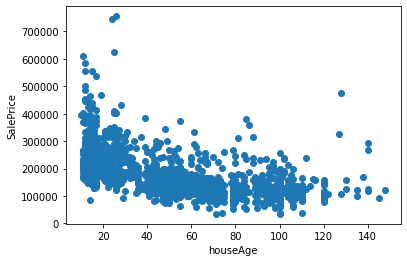

In [850]:
fig, ax = plt.subplots()
ax.set_xlabel("houseAge")                                
ax.set_ylabel("SalePrice")

plt.scatter(housing.houseAge, housing.SalePrice)
plt.show()

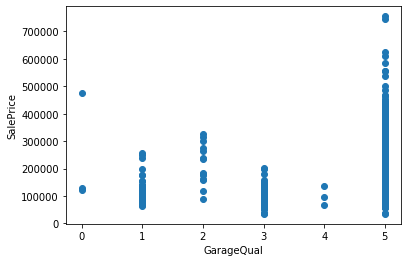

In [851]:
fig, ax = plt.subplots()
ax.set_xlabel("GarageQual")                                
ax.set_ylabel("SalePrice")

plt.scatter([housing.GarageQual], housing.SalePrice)
plt.show()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text xticklabel objects>)

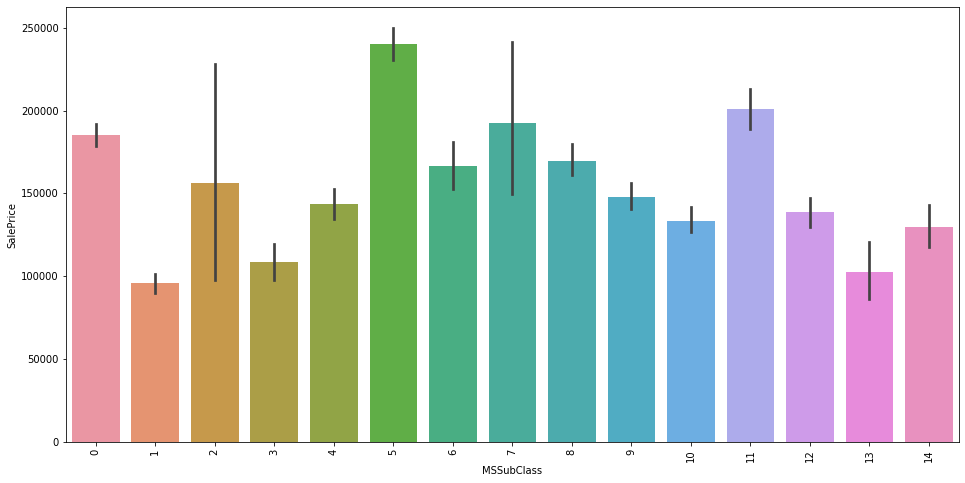

In [852]:
plt.figure(figsize=(16, 8))
sns.barplot(x="MSSubClass", y="SalePrice", data=housing)
plt.xticks(rotation=90)

Text(0, 0.5, 'SalePrice')

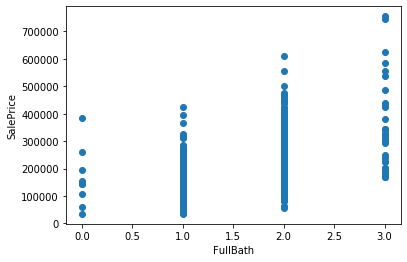

In [853]:
plt.scatter(housing['FullBath'], housing['SalePrice'])
plt.xlabel('FullBath')
plt.ylabel('SalePrice')

Text(0, 0.5, 'SalePrice')

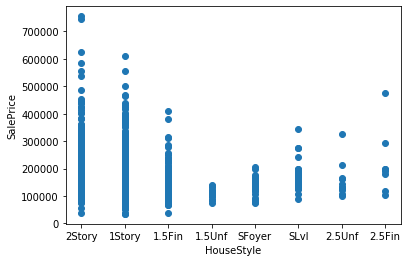

In [854]:
plt.scatter(housing['HouseStyle'], housing['SalePrice'])
plt.xlabel('HouseStyle')
plt.ylabel('SalePrice')

### Visualize categorical variable

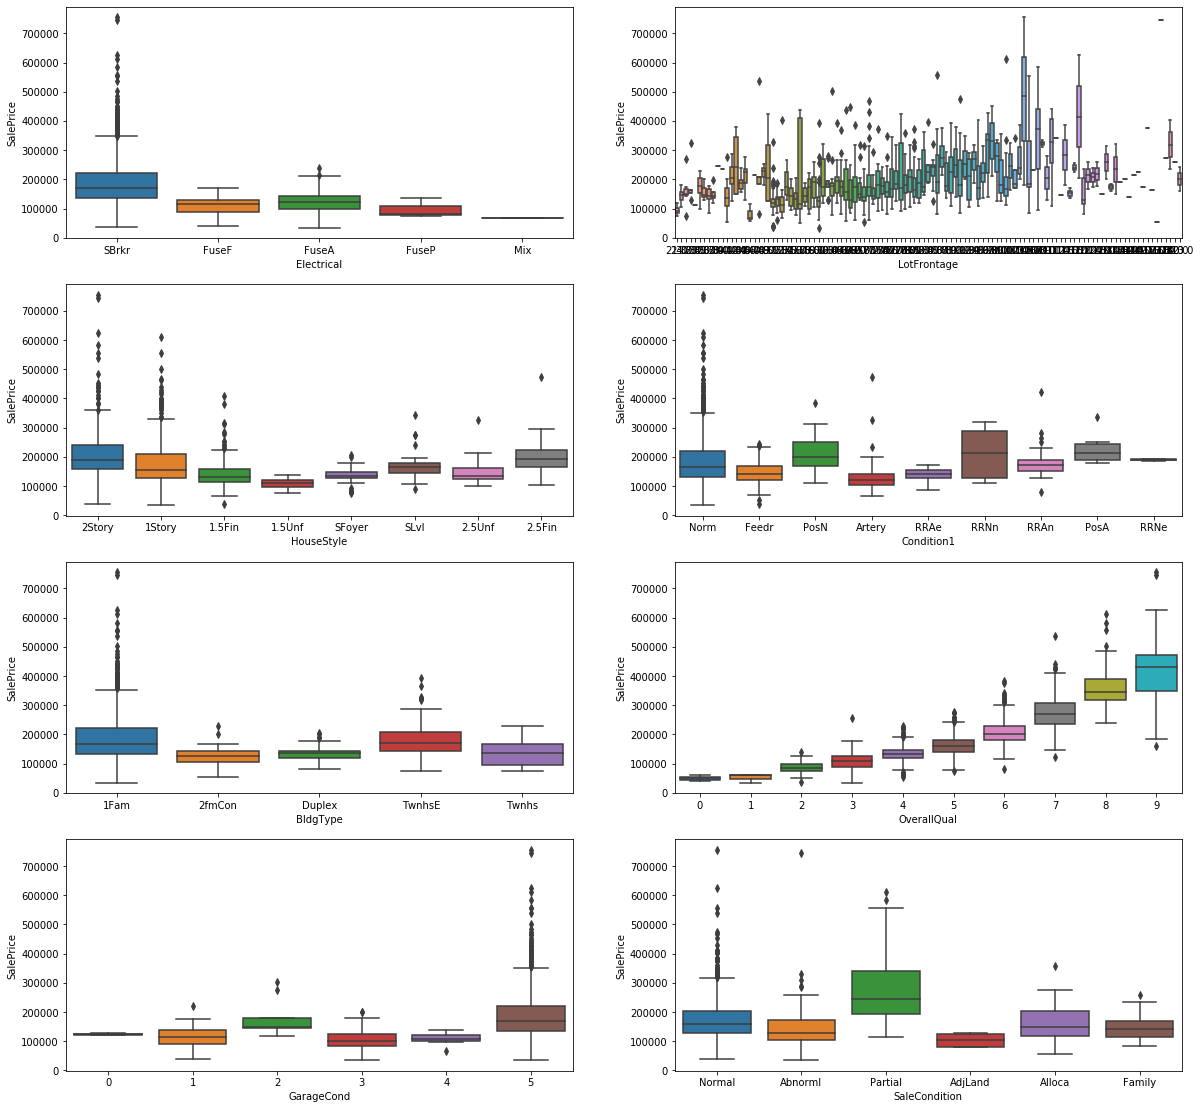

In [855]:
plt.figure(figsize=(20, 40))
plt.subplot(8,2,1)
sns.boxplot(x = 'Electrical', y = 'SalePrice', data = housing)
plt.subplot(8,2,2)
sns.boxplot(x = 'LotFrontage', y = 'SalePrice', data = housing)
plt.subplot(8,2,3)
sns.boxplot(x = 'HouseStyle', y = 'SalePrice', data = housing)
plt.subplot(8,2,4)
sns.boxplot(x = 'Condition1', y = 'SalePrice', data = housing)
plt.subplot(8,2,5)
sns.boxplot(x = 'BldgType', y = 'SalePrice', data = housing)
plt.subplot(8,2,6)
sns.boxplot(x = 'OverallQual', y = 'SalePrice', data = housing)
plt.subplot(8,2,7)
sns.boxplot(x = 'GarageCond', y = 'SalePrice', data = housing)
plt.subplot(8,2,8)
sns.boxplot(x = 'SaleCondition', y = 'SalePrice', data = housing)
plt.show()

In [856]:
housing.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street            Alley  \
0   1           5       RL         65.0     8450   Pave  No alley access   
1   2           0       RL         80.0     9600   Pave  No alley access   
2   3           5       RL         68.0    11250   Pave  No alley access   
3   4           6       RL         60.0     9550   Pave  No alley access   
4   5           5       RL         84.0    14260   Pave  No alley access   

  LotShape LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0      Reg         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1      Reg         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2      IR1         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3      IR1         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4      IR1         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  houseAge  \
0       Norm     1Fam     2Story            6            4        17   
1       Norm     1Fam     1Story            5            7        44   
2       Norm     1Fam     2Story            6            4        19   
3       Norm     1Fam     2Story            6            4       105   
4       Norm     1Fam     2Story            7            4        20   

  RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea  \
0     Gable  CompShg     VinylSd     VinylSd    BrkFace       196.0   
1     Gable  CompShg     MetalSd     MetalSd       None         0.0   
2     Gable  CompShg     VinylSd     VinylSd    BrkFace       162.0   
3     Gable  CompShg     Wd Sdng     Wd Shng       None         0.0   
4     Gable  CompShg     VinylSd     VinylSd    BrkFace       350.0   

   ExterQual  ExterCond Foundation  BsmtQual  BsmtCond  BsmtExposure  \
0          2          4      PConc         2         4             3   
1          3          4     CBlock         2         4             1   
2          2          4      PConc         2         4             2   
3          3          4     BrkTil         4         1             3   
4          2          4      PConc         2         4             0   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating  HeatingQC  CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA          0           1      SBrkr       856       854             0   
1    GasA          0           1      SBrkr      1262         0             0   
2    GasA          0           1      SBrkr       920       866             0   
3    GasA          2           1      SBrkr       961       756             0   
4    GasA          0           1      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr  KitchenQual  TotRmsAbvGrd Functional  Fireplaces  \
0             1            2             8        Typ           0   
1             1            3             6        Typ           1   
2             1            2             6        Typ           1   
3             1            2             7        Typ           1

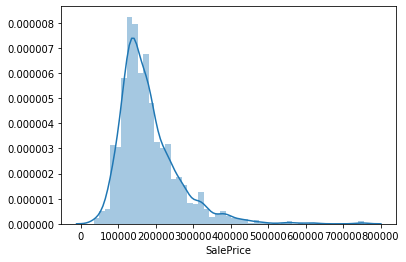

In [857]:
sns.distplot(housing['SalePrice'])
plt.show()

In [858]:
# all numeric (float and int) variables in the dataset
housing_numeric = housing.select_dtypes(include=['float64', 'int64'])
housing_numeric.head()

Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  houseAge  \
0   1           5         65.0     8450            6            4        17   
1   2           0         80.0     9600            5            7        44   
2   3           5         68.0    11250            6            4        19   
3   4           6         60.0     9550            6            4       105   
4   5           5         84.0    14260            7            4        20   

   MasVnrArea  ExterQual  ExterCond  BsmtQual  BsmtCond  BsmtExposure  \
0       196.0          2          4         2         4             3   
1         0.0          3          4         2         4             1   
2       162.0          2          4         2         4             2   
3         0.0          3          4         4         1             3   
4       350.0          2          4         2         4             0   

   BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  HeatingQC  CentralAir  \
0         706           0        150          856          0           1   
1         978           0        284         1262          0           1   
2         486           0        434          920          0           1   
3         216           0        540          756          2           1   
4         655           0        490         1145          0           1   

   1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
0       856       854             0       1710             1             0   
1      1262         0             0       1262             0             1   
2       920       866             0       1786             1             0   
3       961       756             0       1717             1             0   
4      1145      1053             0       2198             1             0   

   FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  KitchenQual  TotRmsAbvGrd  \
0         2         1             3             1            2             8   
1         2         0             3             1            3             6   
2         2         1             3             1            2             6   
3         1         0             3             1            2             7   
4         2         1             4             1            2             9   

   Fireplaces  FireplaceQu  GarageCars  GarageArea  GarageQual  GarageCond  \
0           0            3           2         548           5           5   
1           1            5           2         460           5           5   
2           1            5           2         608           5           5   
3           1            2           3         642           5           5   
4           1            5           3         836           5           5   

   WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  \
0           0           61              0          0            0         0   
1         298            0              0          0            0         0   
2           0           42              0          0            0         0   
3           0           35            272          0            0         0   
4         192           84              0          0            0         0   

   PoolQC  Fence  MiscVal  SalePrice  
0       3      4        0     208500  
1       3      4        0     181500  
2       3      4        0     223500  
3       3      4        0     140000  
4       3      4        0     250000

In [859]:
pairPlot = housing_numeric[['LotFrontage', 'LotArea', 'LotArea', 'OverallQual', 'OverallCond', 'houseAge', 'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'SalePrice']]
pairPlot.corr()

LotFrontage   LotArea   LotArea  OverallQual  OverallCond  \
LotFrontage     1.000000  0.306795  0.306795     0.234196    -0.052820   
LotArea         0.306795  1.000000  1.000000     0.105806    -0.005636   
LotArea         0.306795  1.000000  1.000000     0.105806    -0.005636   
OverallQual     0.234196  0.105806  0.105806     1.000000    -0.091932   
OverallCond    -0.052820 -0.005636 -0.005636    -0.091932     1.000000   
houseAge       -0.117598 -0.014228 -0.014228    -0.572323     0.375983   
MasVnrArea      0.178699  0.103321  0.103321     0.407252    -0.125694   
BsmtFinSF1      0.215828  0.214103  0.214103     0.239666    -0.046231   
BsmtUnfSF       0.122156 -0.002618 -0.002618     0.308159    -0.136841   
TotalBsmtSF     0.363358  0.260833  0.260833     0.537808    -0.171098   
1stFlrSF        0.414266  0.299475  0.299475     0.476224    -0.144203   
2ndFlrSF        0.072483  0.050986  0.050986     0.295493     0.028942   
GrLivArea       0.368392  0.263116  0.263116     0.593007    -0.079686   
GarageArea      0.323663  0.180403  0.180403     0.562022    -0.151521   
WoodDeckSF      0.077106  0.171698  0.171698     0.238923    -0.003334   
OpenPorchSF     0.137454  0.084774  0.084774     0.308819    -0.032589   
SalePrice       0.334901  0.263843  0.263843     0.790982    -0.077856   

             houseAge  MasVnrArea  BsmtFinSF1  BsmtUnfSF  TotalBsmtSF  \
LotFrontage -0.117598    0.178699    0.215828   0.122156     0.363358   
LotArea     -0.014228    0.103321    0.214103  -0.002618     0.260833   
LotArea     -0.014228    0.103321    0.214103  -0.002618     0.260833   
OverallQual -0.572323    0.407252    0.239666   0.308159     0.537808   
OverallCond  0.375983   -0.125694   -0.046231  -0.136841    -0.171098   
houseAge     1.000000   -0.311600   -0.249503  -0.149040    -0.391452   
MasVnrArea  -0.311600    1.000000    0.261256   0.113862     0.360067   
BsmtFinSF1  -0.249503    0.261256    1.000000  -0.495251     0.522396   
BsmtUnfSF   -0.149040    0.113862   -0.495251   1.000000     0.415360   
TotalBsmtSF -0.391452    0.360067    0.522396   0.415360     1.000000   
1stFlrSF    -0.281986    0.339850    0.445863   0.317987     0.819530   
2ndFlrSF    -0.010308    0.173800   -0.137079   0.004469    -0.174512   
GrLivArea   -0.199010    0.388052    0.208171   0.240257     0.454868   
GarageArea  -0.478954    0.370884    0.296970   0.183303     0.486665   
WoodDeckSF  -0.224880    0.159991    0.204306  -0.005316     0.232019   
OpenPorchSF -0.188686    0.122528    0.111761   0.129005     0.247264   
SalePrice   -0.522897    0.472614    0.386420   0.214479     0.613581   

             1stFlrSF  2ndFlrSF  GrLivArea  GarageArea  WoodDeckSF  \
LotFrontage  0.414266  0.072483   0.368392    0.323663    0.077106   
LotArea      0.299475  0.050986   0.263116    0.180403    0.171698   
LotArea      0.299475  0.050986   0.263116    0.180403    0.171698   
OverallQual  0.476224  0.295493   0.593007    0.562022    0.238923   
OverallCond -0.144203  0.028942  -0.079686   -0.151521   -0.003334   
houseAge    -0.281986 -0.010308  -0.199010   -0.478954   -0.224880   
MasVnrArea   0.339850  0.173800   0.388052    0.370884    0.159991   
BsmtFinSF1   0.445863 -0.137079   0.208171    0.296970    0.204306   
BsmtUnfSF    0.317987  0.004469   0.240257    0.183303   -0.005316   
TotalBsmtSF  0.819530 -0.174512   0.454868    0.486665    0.232019   
1stFlrSF     1.000000 -0.202646   0.566024    0.489782    0.235459   
2ndFlrSF    -0.202646  1.000000   0.687501    0.138347    0.092165   
GrLivArea    0.566024  0.687501   1.000000    0.468997    0.247433   
GarageArea   0.489782  0.138347   0.468997    1.000000    0.224666   
WoodDeckSF   0.235459  0.092165   0.247433    0.224666    1.000000   
OpenPorchSF  0.211671  0.208026   0.330224    0.241435    0.058661   
SalePrice    0.605852  0.319334   0.708624    0.623431    0.324413   

             OpenPorchSF  SalePrice  
LotFrontage     0.137454   0.334901  
LotArea         0.084774   0

In [580]:
# paiwise scatter plot

plt.figure(figsize=(20, 10))
sns.pairplot(housing_numeric)
plt.show()

<Figure size 1440x720 with 0 Axes>

In [860]:
housing_numeric.corr()

Id  MSSubClass  LotFrontage   LotArea  OverallQual  \
Id             1.000000    0.018745    -0.009601 -0.033226    -0.028365   
MSSubClass     0.018745    1.000000    -0.308758 -0.132505     0.056546   
LotFrontage   -0.009601   -0.308758     1.000000  0.306795     0.234196   
LotArea       -0.033226   -0.132505     0.306795  1.000000     0.105806   
OverallQual   -0.028365    0.056546     0.234196  0.105806     1.000000   
OverallCond    0.012609   -0.060795    -0.052820 -0.005636    -0.091932   
houseAge       0.012713   -0.033544    -0.117598 -0.014228    -0.572323   
MasVnrArea    -0.051071    0.031444     0.178699  0.103321     0.407252   
ExterQual      0.001689   -0.019969    -0.183293 -0.057275    -0.634319   
ExterCond      0.029826    0.007819     0.047951  0.015160     0.138581   
BsmtQual       0.047668   -0.090427    -0.139701 -0.061495    -0.599639   
BsmtCond       0.007223   -0.028777     0.055936  0.016715     0.106356   
BsmtExposure  -0.024332   -0.084258    -0.125119 -0.140209    -0.266570   
BsmtFinSF1    -0.005024   -0.073706     0.215828  0.214103     0.239666   
BsmtFinSF2    -0.005968   -0.072990     0.043340  0.111170    -0.059119   
BsmtUnfSF     -0.007940   -0.137092     0.122156 -0.002618     0.308159   
TotalBsmtSF   -0.015415   -0.241548     0.363358  0.260833     0.537808   
HeatingQC      0.002157    0.021791    -0.079975  0.004212    -0.425944   
CentralAir     0.009821   -0.096907     0.068666  0.049755     0.272038   
1stFlrSF       0.010496   -0.233980     0.414266  0.299475     0.476224   
2ndFlrSF       0.005590    0.359167     0.072483  0.050986     0.295493   
LowQualFinSF  -0.044230    0.051697     0.036849  0.004779    -0.030429   
GrLivArea      0.008273    0.131017     0.368392  0.263116     0.593007   
BsmtFullBath   0.002289    0.001790     0.091481  0.158155     0.111098   
BsmtHalfBath  -0.020155    0.013119    -0.006419  0.048046    -0.040150   
FullBath       0.005587    0.166707     0.180424  0.126031     0.550600   
HalfBath       0.006784    0.208262     0.048258  0.014259     0.273458   
BedroomAbvGr   0.037719    0.026335     0.237023  0.119690     0.101676   
KitchenAbvGr   0.002951    0.323390    -0.005805 -0.017784    -0.183882   
KitchenQual   -0.004432    0.008222    -0.189082 -0.057018    -0.555348   
TotRmsAbvGrd   0.027239    0.107517     0.320146  0.190015     0.427452   
Fireplaces    -0.019772   -0.019405     0.235755  0.271364     0.396765   
FireplaceQu    0.003765    0.062303    -0.016492  0.005323    -0.097084   
GarageCars     0.016570   -0.009126     0.269729  0.154871     0.600671   
GarageArea     0.017634   -0.074673     0.323663  0.180403     0.562022   
GarageQual     0.001955   -0.031166     0.094808  0.053079     0.211802   
GarageCond    -0.008379   -0.038656     0.091630  0.065741     0.270658   
WoodDeckSF    -0.029643   -0.002892     0.077106  0.171698     0.238923   
OpenPorchSF   -0.000477    0.003643     0.137454  0.084774     0.308819   
EnclosedPorch  0.002889   -0.005194     0.009790 -0.018340    -0.113937   
3SsnPorch     -0.046635   -0.044435     0.062335  0.020423     0.030371   
ScreenPorch    0.001330   -0.017886     0.037684  0.043160     0.064886   
PoolArea       0.057044    0.020837     0.180868  0.077672     0.065166   
PoolQC        -0.033928   -0.015024    -0.191630 -0.065167    -0.079987   
Fence         -0.000399    0.074567    -0.036751  0.036031     0.145442   
MiscVal       -0.006242   -0.006062     0.001168  0.038068    -0.031406   
SalePrice     -0.021917   -0.054751     0.334901  0.263843     0.790982   

               OverallCond  houseAge  MasVnrArea  ExterQual  ExterCond  \
Id                0.012609  0.012713   -0.051071   0.001689   0.029826   
MSSubClass       -0.060795 -0.033544    0.031444  -0.019969   0.007819   
LotFrontage      -0.052820 -0.117598    0.178699  -0.183293   0.047951   
LotArea          -0.005636 -0.014228    0.103321  -0.057275   0.015160   
OverallQual      -0.091932 -0.572323    0.407252  

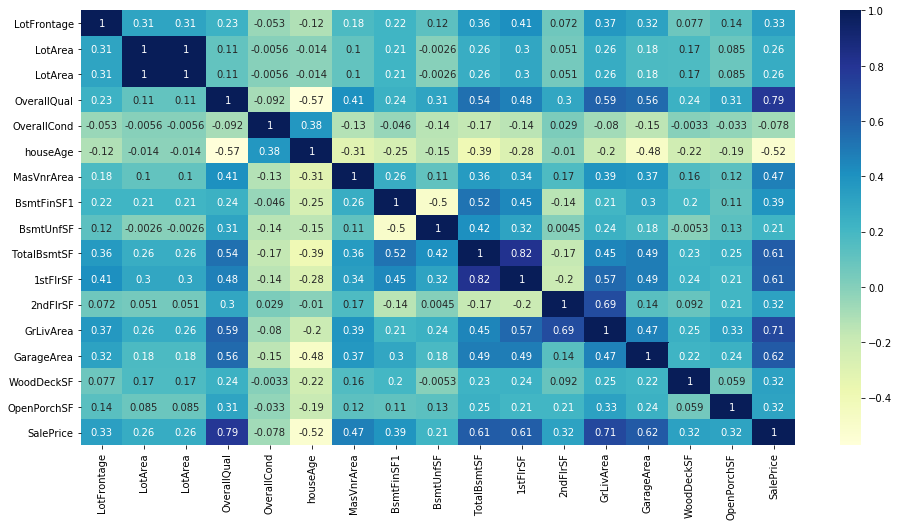

In [861]:
# plotting correlations on a heatmap but not able to understand due to more variables

# figure size
plt.figure(figsize=(16,8))

# heatmap
sns.heatmap(pairPlot.corr(), cmap="YlGnBu", annot=True)
plt.show()

### creating dummy variables for categorical variables

In [862]:
# creating dummy variables for categorical variables

# subset all categorical variables
housing_categorical = housing.select_dtypes(include=['object'])
housing_categorical.head()

MSZoning Street            Alley LotShape LandContour Utilities LotConfig  \
0       RL   Pave  No alley access      Reg         Lvl    AllPub    Inside   
1       RL   Pave  No alley access      Reg         Lvl    AllPub       FR2   
2       RL   Pave  No alley access      IR1         Lvl    AllPub    Inside   
3       RL   Pave  No alley access      IR1         Lvl    AllPub    Corner   
4       RL   Pave  No alley access      IR1         Lvl    AllPub       FR2   

  LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle RoofStyle  \
0       Gtl      CollgCr       Norm       Norm     1Fam     2Story     Gable   
1       Gtl      Veenker      Feedr       Norm     1Fam     1Story     Gable   
2       Gtl      CollgCr       Norm       Norm     1Fam     2Story     Gable   
3       Gtl      Crawfor       Norm       Norm     1Fam     2Story     Gable   
4       Gtl      NoRidge       Norm       Norm     1Fam     2Story     Gable   

  RoofMatl Exterior1st Exterior2nd MasVnrType Foundation BsmtFinType1  \
0  CompShg     VinylSd     VinylSd    BrkFace      PConc          GLQ   
1  CompShg     MetalSd     MetalSd       None     CBlock          ALQ   
2  CompShg     VinylSd     VinylSd    BrkFace      PConc          GLQ   
3  CompShg     Wd Sdng     Wd Shng       None     BrkTil          ALQ   
4  CompShg     VinylSd     VinylSd    BrkFace      PConc          GLQ   

  BsmtFinType2 Heating Electrical Functional GarageType GarageFinish  \
0          Unf    GasA      SBrkr        Typ     Attchd          RFn   
1          Unf    GasA      SBrkr        Typ     Attchd          RFn   
2          Unf    GasA      SBrkr        Typ     Attchd          RFn   
3          Unf    GasA      SBrkr        Typ     Detchd          Unf   
4          Unf    GasA      SBrkr        Typ     Attchd          RFn   

  PavedDrive MiscFeature SaleType SaleCondition  
0          Y        None       WD        Normal  
1          Y        None       WD        Normal  
2          Y        None       WD        Normal  
3          Y        None       WD       Abnorml  
4          Y        None       WD        Normal

### convert into dummies

In [863]:
# convert into dummies
housing_dummies = pd.get_dummies(housing_categorical, drop_first=True)
housing_dummies.head()

MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  Street_Pave  \
0            0            0            1            0            1   
1            0            0            1            0            1   
2            0            0            1            0            1   
3            0            0            1            0            1   
4            0            0            1            0            1   

   Alley_No alley access  Alley_Pave  LotShape_IR2  LotShape_IR3  \
0                      1           0             0             0   
1                      1           0             0             0   
2                      1           0             0             0   
3                      1           0             0             0   
4                      1           0             0             0   

   LotShape_Reg  LandContour_HLS  LandContour_Low  LandContour_Lvl  \
0             1                0                0                1   
1             1                0                0                1   
2             0                0                0                1   
3             0                0                0                1   
4             0                0                0                1   

   Utilities_NoSeWa  LotConfig_CulDSac  LotConfig_FR2  LotConfig_FR3  \
0                 0                  0              0              0   
1                 0                  0              1              0   
2                 0                  0              0              0   
3                 0                  0              0              0   
4                 0                  0              1              0   

   LotConfig_Inside  LandSlope_Mod  LandSlope_Sev  Neighborhood_Blueste  \
0                 1              0              0                     0   
1                 0              0              0                     0   
2                 1              0              0                     0   
3                 0              0              0                     0   
4                 0              0              0                     0   

   Neighborhood_BrDale  Neighborhood_BrkSide  Neighborhood_ClearCr  \
0                    0                     0                     0   
1                    0                     0                     0   
2                    0                     0                     0   
3                    0                     0                     0   
4                    0                     0                     0   

   Neighborhood_CollgCr  Neighborhood_Crawfor  Neighborhood_Edwards  \
0                     1                     0                     0   
1                     0                     0                     0   
2                     1                     0                     0   
3                     0                     1                     0   
4                     0                     0                     0   

   Neighborhood_Gilbert  Neighborhood_IDOTRR  Neighborhood_MeadowV  \
0                     0                    0                     0   
1                     0                    0                     0   
2                     0                    0                     0   
3                     0                    0                     0   
4                     0                    0                     0   

   Neighborhood_Mitchel  Neighborhood_NAmes  Neighborhood_NPkVill  \
0                     0                   0                     0   
1                     0                   0                     0   
2                     0                   0                     0   
3                     0                   0                     0   
4                     0                   0                     0   

   Neighborhood_NWAmes  Neighborhood_NoRidge  Neighborhood_NridgHt  \
0                    0                     0                     0   
1                    0                     0

In [864]:
# drop categorical variables 
housing = housing.drop(list(housing_categorical.columns), axis=1)

In [865]:
# concat dummy variables with X
housing = pd.concat([housing, housing_dummies], axis=1)

In [866]:
housing.shape

(1460, 221)

## Splitting the data into train and test

In [867]:
# Putting feature variable to X
X = housing.drop(['SalePrice', 'Id'], axis=1)

# X.head()

In [868]:
# scaling the features
from sklearn.preprocessing import scale

# storing column names in cols, since column names are (annoyingly) lost after 
# scaling (the df is converted to a numpy array)
cols = X.columns
X = pd.DataFrame(scale(X))
X.columns = cols
X.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'houseAge', 'MasVnrArea', 'ExterQual', 'ExterCond', 'BsmtQual',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=219)

In [869]:
X.head()

MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  houseAge  \
0    0.200350    -0.229372 -0.207142     0.651479    -0.517200 -1.050994   
1   -1.001421     0.451936 -0.091886    -0.071836     2.179628 -0.156734   
2    0.200350    -0.093110  0.073480     0.651479    -0.517200 -0.984752   
3    0.440704    -0.456474 -0.096897     0.651479    -0.517200  1.863632   
4    0.200350     0.633618  0.375148     1.374795    -0.517200 -0.951632   

   MasVnrArea  ExterQual  ExterCond  BsmtQual  BsmtCond  BsmtExposure  \
0    0.514104  -0.777976   0.364207 -0.566939  0.325405      0.591905   
1   -0.570750   0.663451   0.364207 -0.566939  0.325405     -1.124444   
2    0.325915  -0.777976   0.364207 -0.566939  0.325405     -0.266269   
3   -0.570750   0.663451   0.364207  0.997770 -2.834848      0.591905   
4    1.366489  -0.777976   0.364207 -0.566939  0.325405     -1.982619   

   BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  HeatingQC  CentralAir  \
0    0.575425   -0.288653  -0.944591    -0.459303  -0.884658    0.263813   
1    1.171992   -0.288653  -0.641228     0.466465  -0.884658    0.263813   
2    0.092907   -0.288653  -0.301643    -0.313369  -0.884658    0.263813   
3   -0.499274   -0.288653  -0.061670    -0.687324   0.265476    0.263813   
4    0.463568   -0.288653  -0.174865     0.199680  -0.884658    0.263813   

   1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
0 -0.793434  1.161852     -0.120242   0.370333      1.107810     -0.241061   
1  0.257140 -0.795163     -0.120242  -0.482512     -0.819964      3.948809   
2 -0.627826  1.189351     -0.120242   0.515013      1.107810     -0.241061   
3 -0.521734  0.937276     -0.120242   0.383659      1.107810     -0.241061   
4 -0.045611  1.617877     -0.120242   1.299326      1.107810     -0.241061   

   FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  KitchenQual  TotRmsAbvGrd  \
0  0.789741  1.227585      0.163779     -0.211454    -0.409369      0.912210   
1  0.789741 -0.761621      0.163779     -0.211454     0.795629     -0.318683   
2  0.789741  1.227585      0.163779     -0.211454    -0.409369     -0.318683   
3 -1.026041 -0.761621      0.163779     -0.211454    -0.409369      0.296763   
4  0.789741  1.227585      1.390023     -0.211454    -0.409369      1.527656   

   Fireplaces  FireplaceQu  GarageCars  GarageArea  GarageQual  GarageCond  \
0   -0.951226    -0.075117    0.311725    0.351000    0.315602    0.295349   
1    0.600495     1.638498    0.311725   -0.060731    0.315602    0.295349   
2    0.600495     1.638498    0.311725    0.631726    0.315602    0.295349   
3    0.600495    -0.931925    1.650307    0.790804    0.315602    0.295349   
4    0.600495     1.638498    1.650307    1.698485    0.315602    0.295349   

   WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  \
0   -0.752176     0.216503      -0.359325  -0.116339    -0.270208 -0.068692   
1    1.626195    -0.704483      -0.359325  -0.116339    -0.270208 -0.068692   
2   -0.752176    -0.070361      -0.359325  -0.116339    -0.270208 -0.068692   
3   -0.752176    -0.176048       4.092524  -0.116339    -0.270208 -0.068692   
4    0.780197     0.563760      -0.359325  -0.116339    -0.270208 -0.068692   

     PoolQC     Fence   MiscVal  MSZoning_FV  MSZoning_RH  MSZoning_RL  \
0  0.063305  0.457447 -0.087688    -0.215859    -0.105263     0.518133   
1  0.063305  0.457447 -0.087688    -0.215859    -0.105263     0.518133   
2  0.063305  0.457447 -0.087688    -0.215859    -0.105263     0.518133   
3  0.063305  0.457447 -0.087688    -0.215859    -0.105263     0.518133   
4  0.063305  0.457447 -0.087688    -0.215859    -0.105263     0.518133   

   MSZoning_RM  Street_Pave  Alley_No alley access  Alley_Pave  LotShape_IR2  \
0    -0.418955     0.064238               0.257821   -0.169981     -0.169981   
1    -0.418955     0.064238               0.257821   -0.169981     -0.169981   
2    -0.418955     0.064238               0.257821   -0.169981     -0.1

In [870]:
# Putting response variable to y
y = housing['SalePrice']

y.head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

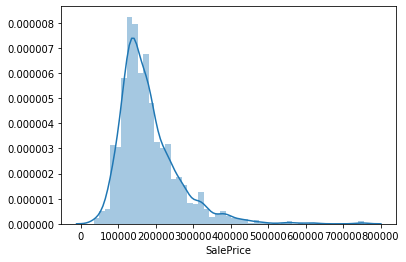

In [871]:
# Ploting the Sales column
sns.distplot(y)
plt.show()

## Taken Log for Sales to Transform the column outlier

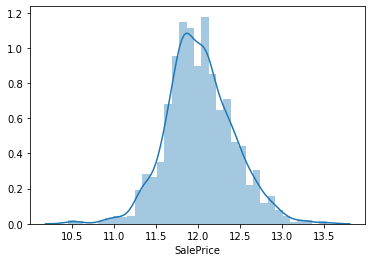

In [872]:
# Taken Log for Sales to Transform the column outlier
y = np.log(y)
sns.distplot(y)
plt.show()

In [873]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [874]:
X_train.head()

MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  houseAge  \
210    -0.761067    -0.138531 -0.492374    -0.795151     0.381743  1.532424   
318     0.200350     0.906141 -0.061820     0.651479    -0.517200 -0.719786   
239    -0.040004    -0.819839 -0.177977    -0.071836    -1.416142  0.870009   
986    -0.040004    -0.501895 -0.521839    -0.071836     2.179628  2.029235   
1416    2.363539    -0.456474  0.082500    -1.518467     0.381743  2.857254   

      MasVnrArea  ExterQual  ExterCond  BsmtQual  BsmtCond  BsmtExposure  \
210    -0.570750   0.663451   0.364207  0.997770  0.325405      0.591905   
318     0.846202  -0.777976   0.364207 -0.566939  0.325405     -1.124444   
239    -0.570750   0.663451   0.364207  0.997770 -3.888266      0.591905   
986    -0.570750   0.663451  -2.369689  0.997770 -3.888266      0.591905   
1416   -0.570750   0.663451   0.364207  0.997770  0.325405      0.591905   

      BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  HeatingQC  CentralAir  \
210     0.053428   -0.288653  -0.387671    -0.441061   1.415610   -3.790570   
318     1.191731   -0.288653  -0.469172     0.660283  -0.884658    0.263813   
239    -0.766852   -0.288653   0.166984    -0.735209   1.415610    0.263813   
986    -0.973018   -0.288653  -0.186184    -1.305262   0.265476    0.263813   
1416   -0.973018   -0.288653   0.474875    -0.639440   0.265476    0.263813   

      1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
210  -0.772733 -0.795163     -0.120242  -1.240174      1.107810     -0.241061   
318   0.541779  2.124318     -0.120242   2.152171      1.107810     -0.241061   
239  -0.943516  0.783740     -0.120242  -0.054186     -0.819964     -0.241061   
986  -0.418229  0.657703     -0.120242   0.227558     -0.819964     -0.241061   
1416  0.215738  1.597253     -0.120242   1.474464     -0.819964     -0.241061   

      FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  KitchenQual  \
210  -1.026041 -0.761621     -1.062465     -0.211454     0.795629   
318   0.789741  1.227585      1.390023     -0.211454    -0.409369   
239  -1.026041  1.227585      0.163779     -0.211454     0.795629   
986  -1.026041 -0.761621     -1.062465     -0.211454    -0.409369   
1416  0.789741 -0.761621      1.390023      4.328579     0.795629   

      TotRmsAbvGrd  Fireplaces  FireplaceQu  GarageCars  GarageArea  \
210      -0.934130   -0.951226    -0.075117   -2.365440   -2.212963   
318       1.527656    0.600495     1.638498    1.650307    0.856307   
239       0.296763    0.600495    -0.931925   -1.026858   -1.183635   
986      -0.934130   -0.951226    -0.075117   -1.026858   -1.019878   
1416      2.758549   -0.951226    -0.075117    0.311725    0.407146   

      GarageQual  GarageCond  WoodDeckSF  OpenPorchSF  EnclosedPorch  \
210    -1.910383   -2.197190   -0.752176    -0.704483       1.211916   
318     0.315602    0.295349    1.961401     0.201405       1.997536   
239     0.315602    0.295349   -0.752176     1.409256      -0.359325   
986    -4.136368    0.295349    2.392381    -0.704483      -0.359325   
1416    0.315602    0.295349   -0.752176    -0.704483       1.506523   

      3SsnPorch  ScreenPorch  PoolArea    PoolQC     Fence   MiscVal  \
210   -0.116339    -0.270208 -0.068692  0.063305  0.457447 -0.087688   
318   -0.116339    -0.270208 -0.068692  0.063305  0.457447 -0.087688   
239   -0.116339    -0.270208 -0.068692  0.063305 -1.390058 -0.087688   
986   -0.116339    -0.270208 -0.068692  0.063305  0.457447 -0.087688   
1416  -0.116339    -0.270208 -0.068692  0.063305  0.457447 -0.087688   

      MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  Street_Pave  \
210     -0.215859    -0.105263     0.518133    -0.418955     0.064238   
318     -0.215859    -0.105263     0.518133    -0.418955     0.064238   
239     -0.215859    -0.105263     0.518133    -0.418955     0.064238   
986     -0.215859    -0.105263    -1.930005     2.386891     0.064238   
1416    -0.215859    -0.105263    -1.93

In [875]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()

In [876]:
rfe = RFE(linreg, 25)             # running RFE with 25 variables as output
rfe = rfe.fit(X_train, y_train)

In [877]:
rfe.support_

array([False, False, False,  True,  True,  True, False, False, False,
       False, False, False,  True,  True,  True,  True, False, False,
        True,  True,  True,  True, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False,  True,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True,  True,  True,  True,  True,  True,
        True, False,

In [878]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('MSSubClass', False, 155),
 ('LotFrontage', False, 46),
 ('LotArea', False, 12),
 ('OverallQual', True, 1),
 ('OverallCond', True, 1),
 ('houseAge', True, 1),
 ('MasVnrArea', False, 164),
 ('ExterQual', False, 167),
 ('ExterCond', False, 69),
 ('BsmtQual', False, 6),
 ('BsmtCond', False, 175),
 ('BsmtExposure', False, 78),
 ('BsmtFinSF1', True, 1),
 ('BsmtFinSF2', True, 1),
 ('BsmtUnfSF', True, 1),
 ('TotalBsmtSF', True, 1),
 ('HeatingQC', False, 25),
 ('CentralAir', False, 22),
 ('1stFlrSF', True, 1),
 ('2ndFlrSF', True, 1),
 ('LowQualFinSF', True, 1),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', False, 14),
 ('BsmtHalfBath', False, 166),
 ('FullBath', False, 165),
 ('HalfBath', False, 161),
 ('BedroomAbvGr', False, 145),
 ('KitchenAbvGr', False, 11),
 ('KitchenQual', False, 21),
 ('TotRmsAbvGrd', False, 80),
 ('Fireplaces', False, 5),
 ('FireplaceQu', False, 194),
 ('GarageCars', False, 45),
 ('GarageArea', True, 1),
 ('GarageQual', False, 102),
 ('GarageCond', False, 140),
 ('WoodDe

In [879]:
col = X_train.columns[rfe.support_]

In [880]:
X_train.columns[~rfe.support_]

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'MasVnrArea', 'ExterQual',
       'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'HeatingQC',
       ...
       'SaleType_Con', 'SaleType_ConLD', 'SaleType_ConLI', 'SaleType_ConLw',
       'SaleType_Oth', 'SaleType_WD', 'SaleCondition_AdjLand',
       'SaleCondition_Alloca', 'SaleCondition_Family', 'SaleCondition_Normal'],
      dtype='object', length=194)

In [881]:
col

Index(['OverallQual', 'OverallCond', 'houseAge', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'GarageArea', 'MSZoning_FV', 'MSZoning_RL', 'MSZoning_RM',
       'Condition2_PosN', 'RoofMatl_CompShg', 'RoofMatl_Membran',
       'RoofMatl_Metal', 'RoofMatl_Roll', 'RoofMatl_Tar&Grv',
       'RoofMatl_WdShake', 'RoofMatl_WdShngl', 'SaleType_New',
       'SaleCondition_Partial'],
      dtype='object')

In [882]:
import statsmodels.api as sm

In [883]:

# Add a constant to get an intercept
X_train_sm = sm.add_constant(X_train[col])

# Fit the resgression line using 'OLS'
lr = sm.OLS(y_train, X_train_sm)
m1 = lr.fit()

print(m1.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     429.6
Date:                Sun, 01 Nov 2020   Prob (F-statistic):               0.00
Time:                        17:28:54   Log-Likelihood:                 694.78
No. Observations:                1021   AIC:                            -1344.
Df Residuals:                     998   BIC:                            -1230.
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    12.02

### Model Pred R2 score on Train data

In [884]:
y_train_pred = m1.predict(X_train_sm)

In [885]:
metrics.r2_score(y_true=y_train, y_pred=y_train_pred)

0.904494135876967

In [886]:
y_train.shape

(1021,)

In [887]:
res = (y_train - y_train_pred)

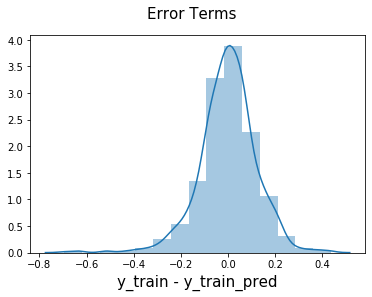

In [888]:
fig = plt.figure()
sns.distplot(res, bins = 15)
fig.suptitle('Error Terms', fontsize = 15)                  # Plot heading 
plt.xlabel('y_train - y_train_pred', fontsize = 15)         # X-label
plt.show()

## Model Building and Evaluation

## Ridge and Lasso Regression
- Predicting Sale price, a dataset used in simple linear regression, to perform ridge and lasso regression.

In [889]:
# Re-create X with best 25 columns
X = X[col]

### Split train and test with latest data set

In [890]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [891]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50 ]}


ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed:    0.9s finished


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20,
                                   50]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [892]:
model_cv.best_estimator_

Ridge(alpha=9.0)

In [893]:
cv_results = pd.DataFrame(model_cv.cv_results_)
# cv_results = cv_results[cv_results['param_alpha']<=200]
cv_results.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0       0.003713      0.000597         0.002143        0.000154      0.0001   
1       0.004226      0.001295         0.003160        0.001833       0.001   
2       0.003468      0.000751         0.002389        0.001061        0.01   
3       0.003017      0.000332         0.002003        0.000363        0.05   
4       0.002953      0.000637         0.001907        0.000669         0.1   

              params  split0_test_score  split1_test_score  split2_test_score  \
0  {'alpha': 0.0001}          -0.091172          -0.110244          -0.102396   
1   {'alpha': 0.001}          -0.091172          -0.110244          -0.102395   
2    {'alpha': 0.01}          -0.091170          -0.110244          -0.102393   
3    {'alpha': 0.05}          -0.091162          -0.110244          -0.102384   
4     {'alpha': 0.1}          -0.091153          -0.110244          -0.102372   

   split3_test_score  split4_test_score  mean_test_score  std_test_score  \
0          -0.108190          -0.089940        -0.100388        0.008440   
1          -0.108189          -0.089940        -0.100388        0.008439   
2          -0.108181          -0.089943        -0.100386        0.008438   
3          -0.108146          -0.089955        -0.100378        0.008429   
4          -0.108102          -0.089970        -0.100368        0.008419   

   rank_test_score  split0_train_score  split1_train_score  \
0               24           -0.089788           -0.089560   
1               23           -0.089788           -0.089560   
2               22           -0.089789           -0.089560   
3               21           -0.089792           -0.089559   
4               20           -0.089797           -0.089559   

   split2_train_score  split3_train_score  split4_train_score  \
0           -0.088761           -0.089552           -0.090058   
1           -0.088761           -0.089552           -0.090058   
2           -0.088762           -0.089552           -0.090058   
3           -0.088766           -0.089555           -0.090059   
4           -0.088772           -0.089559           -0.090061   

   mean_train_score  std_train_score  
0         -0.089544         0.000433  
1         -0.089544         0.000433  
2         -0.089544         0.000433  
3         -0.089547         0.000432  
4         -0.089549         0.000431

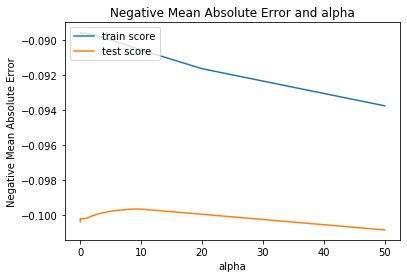

In [894]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [895]:
alpha = 9
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([ 0.11905315,  0.06103334, -0.08672169,  0.04302863,  0.00777128,
       -0.00125008,  0.04633307,  0.0536676 ,  0.05447456, -0.00085909,
        0.08465617,  0.04384055,  0.03021414,  0.05811944,  0.01530183,
       -0.06605549,  0.30211462,  0.06551532,  0.06503757,  0.05742653,
        0.19691073,  0.12789467,  0.15293905,  0.01218331,  0.01204974])

In [896]:
ridge_df = pd.DataFrame({'variable': col, 'estimate': ridge.coef_})

In [897]:
ridge_df.sort_values(by='estimate', ascending=False)

variable  estimate
16       RoofMatl_CompShg  0.302115
20       RoofMatl_Tar&Grv  0.196911
22       RoofMatl_WdShngl  0.152939
21       RoofMatl_WdShake  0.127895
0             OverallQual  0.119053
10              GrLivArea  0.084656
17       RoofMatl_Membran  0.065515
18         RoofMatl_Metal  0.065038
1             OverallCond  0.061033
13            MSZoning_RL  0.058119
19          RoofMatl_Roll  0.057427
8                2ndFlrSF  0.054475
7                1stFlrSF  0.053668
6             TotalBsmtSF  0.046333
11             GarageArea  0.043841
3              BsmtFinSF1  0.043029
12            MSZoning_FV  0.030214
14            MSZoning_RM  0.015302
23           SaleType_New  0.012183
24  SaleCondition_Partial  0.012050
4              BsmtFinSF2  0.007771
9            LowQualFinSF -0.000859
5               BsmtUnfSF -0.001250
15        Condition2_PosN -0.066055
2                houseAge -0.086722

- Alpha value is `9` for Ridge Reg

### Ridge Train score value

In [898]:
ridge.score(X_train,y_train)

0.9002663477584976

### Ridge Test score value

In [899]:
ridge.score(X_test, y_test)

0.8466045607657776

## Lasso

In [900]:
# list of alphas to tune
params = {'alpha': [0.001, 0.002, 0.003, 0.004, 
 0.005, 0.006, 0.007, 0.008, 0.009, 0.01, 0.02, 0.03, 0.05, 0.08, 0.1, 
 4.0, 5.0 ]}

lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 17 candidates, totalling 85 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  85 out of  85 | elapsed:    0.7s finished


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.001, 0.002, 0.003, 0.004, 0.005, 0.006,
                                   0.007, 0.008, 0.009, 0.01, 0.02, 0.03, 0.05,
                                   0.08, 0.1, 4.0, 5.0]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [901]:
model_cv.best_estimator_

Lasso(alpha=0.001)

In [902]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0       0.006972      0.001292         0.002176        0.000053       0.001   
1       0.005636      0.001625         0.002264        0.000441       0.002   
2       0.003631      0.000281         0.001680        0.000105       0.003   
3       0.003271      0.000169         0.001568        0.000011       0.004   
4       0.003991      0.000791         0.002073        0.000415       0.005   

             params  split0_test_score  split1_test_score  split2_test_score  \
0  {'alpha': 0.001}          -0.090233          -0.110501          -0.101324   
1  {'alpha': 0.002}          -0.089879          -0.110830          -0.101599   
2  {'alpha': 0.003}          -0.090292          -0.111065          -0.102553   
3  {'alpha': 0.004}          -0.091581          -0.111203          -0.103762   
4  {'alpha': 0.005}          -0.093726          -0.111342          -0.105733   

   split3_test_score  split4_test_score  mean_test_score  std_test_score  \
0          -0.105301          -0.091253        -0.099723        0.007895   
1          -0.103091          -0.093359        -0.099752        0.007425   
2          -0.101607          -0.096287        -0.100361        0.006912   
3          -0.100579          -0.099439        -0.101313        0.006365   
4          -0.100419          -0.102636        -0.102771        0.005824   

   rank_test_score  split0_train_score  split1_train_score  \
0                1           -0.090294           -0.089464   
1                2           -0.091417           -0.089465   
2                3           -0.093173           -0.089534   
3                4           -0.095542           -0.089626   
4                5           -0.098383           -0.089792   

   split2_train_score  split3_train_score  split4_train_score  \
0           -0.089160           -0.089871           -0.090357   
1           -0.090291           -0.090765           -0.091322   
2           -0.091856           -0.092119           -0.092901   
3           -0.094159           -0.094155           -0.095122   
4           -0.097139           -0.096721           -0.097960   

   mean_train_score  std_train_score  
0         -0.089829         0.000464  
1         -0.090652         0.000719  
2         -0.091917         0.001286  
3         -0.093721         0.002118  
4         -0.095999         0.003158

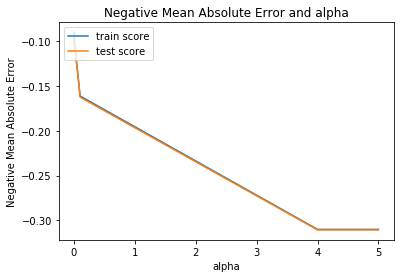

In [903]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [904]:
alpha = 0.001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=0.001)

In [905]:
lasso.coef_

array([ 0.11836729,  0.06115518, -0.08650761,  0.04620096,  0.0071587 ,
       -0.        ,  0.04860032,  0.00401947,  0.        , -0.00669499,
        0.15209119,  0.04335306,  0.02273279,  0.04406096,  0.00302983,
       -0.06637417,  0.34727764,  0.07432877,  0.07368101,  0.06598544,
        0.22756122,  0.14794778,  0.17471602,  0.02394124,  0.        ])

### R2 Score Predicted on train and test data

In [906]:
print('Train score: ', lasso.score(X_train,y_train))
print('Test score: ', lasso.score(X_test,y_test))

Train score:  0.9024589806239308
Test score:  0.8460672857994815


 - Alpha value for Lasso Reg is `0.001`

In [907]:
# lasso model parameters
model_parameters = list(lasso.coef_)
model_parameters.insert(0, lasso.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
best_feature = list(zip(cols, model_parameters))

In [908]:
best_feature

[('constant', 12.022),
 ('OverallQual', 0.118),
 ('OverallCond', 0.061),
 ('houseAge', -0.087),
 ('BsmtFinSF1', 0.046),
 ('BsmtFinSF2', 0.007),
 ('BsmtUnfSF', -0.0),
 ('TotalBsmtSF', 0.049),
 ('1stFlrSF', 0.004),
 ('2ndFlrSF', 0.0),
 ('LowQualFinSF', -0.007),
 ('GrLivArea', 0.152),
 ('GarageArea', 0.043),
 ('MSZoning_FV', 0.023),
 ('MSZoning_RL', 0.044),
 ('MSZoning_RM', 0.003),
 ('Condition2_PosN', -0.066),
 ('RoofMatl_CompShg', 0.347),
 ('RoofMatl_Membran', 0.074),
 ('RoofMatl_Metal', 0.074),
 ('RoofMatl_Roll', 0.066),
 ('RoofMatl_Tar&Grv', 0.228),
 ('RoofMatl_WdShake', 0.148),
 ('RoofMatl_WdShngl', 0.175),
 ('SaleType_New', 0.024),
 ('SaleCondition_Partial', 0.0)]

In [909]:
best_feature = pd.DataFrame(best_feature, columns=['Feature', 'coef_'])
best_feature

Feature   coef_
0                constant  12.022
1             OverallQual   0.118
2             OverallCond   0.061
3                houseAge  -0.087
4              BsmtFinSF1   0.046
5              BsmtFinSF2   0.007
6               BsmtUnfSF  -0.000
7             TotalBsmtSF   0.049
8                1stFlrSF   0.004
9                2ndFlrSF   0.000
10           LowQualFinSF  -0.007
11              GrLivArea   0.152
12             GarageArea   0.043
13            MSZoning_FV   0.023
14            MSZoning_RL   0.044
15            MSZoning_RM   0.003
16        Condition2_PosN  -0.066
17       RoofMatl_CompShg   0.347
18       RoofMatl_Membran   0.074
19         RoofMatl_Metal   0.074
20          RoofMatl_Roll   0.066
21       RoofMatl_Tar&Grv   0.228
22       RoofMatl_WdShake   0.148
23       RoofMatl_WdShngl   0.175
24           SaleType_New   0.024
25  SaleCondition_Partial   0.000

In [910]:
best_feature = best_feature[best_feature['coef_'] != 0].sort_values(by='coef_', ascending=False)

## Best Feature which describe the sales price

In [911]:
best_feature

Feature   coef_
0           constant  12.022
17  RoofMatl_CompShg   0.347
21  RoofMatl_Tar&Grv   0.228
23  RoofMatl_WdShngl   0.175
11         GrLivArea   0.152
22  RoofMatl_WdShake   0.148
1        OverallQual   0.118
19    RoofMatl_Metal   0.074
18  RoofMatl_Membran   0.074
20     RoofMatl_Roll   0.066
2        OverallCond   0.061
7        TotalBsmtSF   0.049
4         BsmtFinSF1   0.046
14       MSZoning_RL   0.044
12        GarageArea   0.043
24      SaleType_New   0.024
13       MSZoning_FV   0.023
5         BsmtFinSF2   0.007
8           1stFlrSF   0.004
15       MSZoning_RM   0.003
10      LowQualFinSF  -0.007
16   Condition2_PosN  -0.066
3           houseAge  -0.087

In [912]:
# best_feature.iloc[6:11]